In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.datasets import load_breast_cancer

cancer_mama = load_breast_cancer()

df = pd.DataFrame(data=cancer_mama.data, columns=cancer_mama.feature_names)
df['target'] = cancer_mama.target

df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [2]:

X = df.drop(columns=['target']) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [3]:

# input_shape solo para la primera

capa0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation = 'relu') 
capa1 = tf.keras.layers.Dense(units=32, activation = 'relu')
capa2 = tf.keras.layers.Dense(units=16, activation = 'relu')
capa3 = tf.keras.layers.Dense(units=1, activation = 'sigmoid')

modelo = tf.keras.Sequential([capa0, capa1, capa2, capa3])

In [4]:
modelo.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(0.1), metrics = ['accuracy'])

entrenamiento = modelo.fit(X_train, y_train, epochs=100, batch_size=32, verbose=False, validation_split=0.1)

evaluacion_modelo = modelo.evaluate(X_test, y_test)
print('Score:', evaluacion_modelo[1])

6/6 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6316
Score: 0.6315789222717285


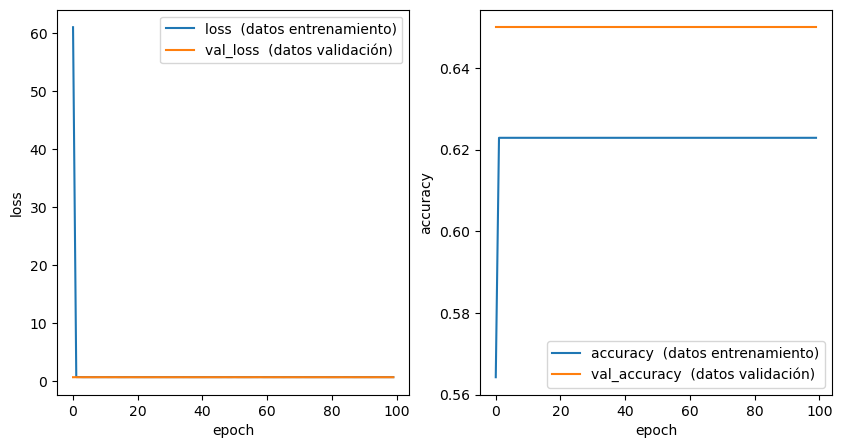

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(entrenamiento.history["loss"], label="loss  (datos entrenamiento)")
ax[0].plot(entrenamiento.history["val_loss"], label="val_loss  (datos validación)")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(entrenamiento.history["accuracy"], label="accuracy  (datos entrenamiento)")
ax[1].plot(entrenamiento.history["val_accuracy"], label="val_accuracy  (datos validación)")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend();

In [6]:
capa0 = tf.keras.layers.Dense(units=10, input_shape=([X.shape[1]]), activation = 'relu') 
capa1 = tf.keras.layers.Dense(units=1, activation = 'sigmoid')

modelo2 = tf.keras.Sequential([capa0, capa1])

6/6 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6316
Score: 0.6315789222717285


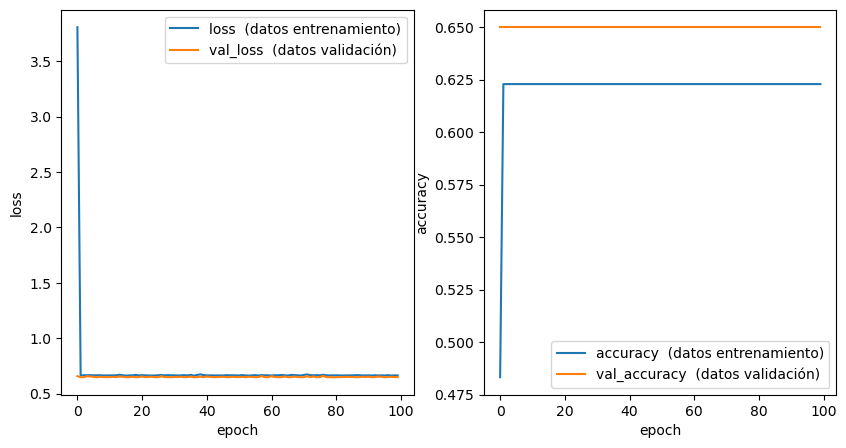

In [7]:
modelo2.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(0.1), metrics = ['accuracy'])

entrenamiento2 = modelo2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=False, validation_split=0.1)

evaluacion_modelo2 = modelo2.evaluate(X_test, y_test)
print('Score:', evaluacion_modelo2[1])

fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(entrenamiento2.history["loss"], label="loss  (datos entrenamiento)")
ax[0].plot(entrenamiento2.history["val_loss"], label="val_loss  (datos validación)")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(entrenamiento2.history["accuracy"], label="accuracy  (datos entrenamiento)")
ax[1].plot(entrenamiento2.history["val_accuracy"], label="val_accuracy  (datos validación)")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend();

In [8]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = df[['bmi']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )
l0 = tf.keras.layers.Dense(units=1, input_shape=[1], activation = 'linear')
redN_regLineal = tf.keras.Sequential([l0])
redN_regLineal.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.2), metrics = ['accuracy'])

redN_regLineal_hist = redN_regLineal.fit(X_train, y_train, epochs=100, verbose=False, validation_split=0.1)
from sklearn.metrics import r2_score

y_pred = redN_regLineal.predict(X_test)

r2_score(y_test, y_pred)

3/3 [==============================] - 0s 8ms/step


-0.03315284880455982

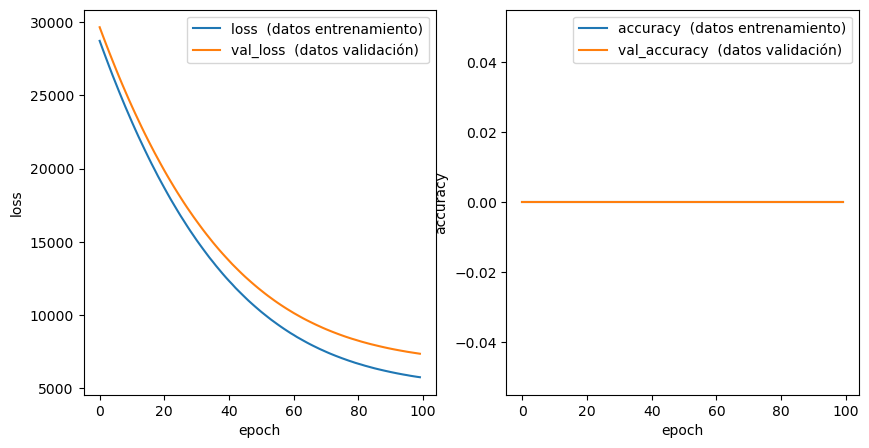

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(redN_regLineal_hist.history["loss"], label="loss  (datos entrenamiento)")
ax[0].plot(redN_regLineal_hist.history["val_loss"], label="val_loss  (datos validación)")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(redN_regLineal_hist.history["accuracy"], label="accuracy  (datos entrenamiento)")
ax[1].plot(redN_regLineal_hist.history["val_accuracy"], label="val_accuracy  (datos validación)")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend();

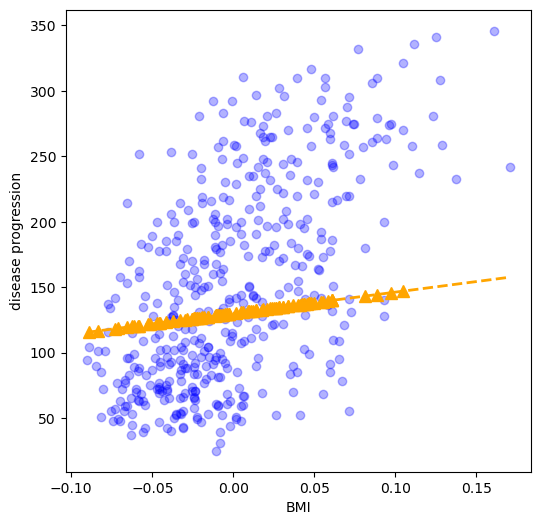

In [10]:
z = np.linspace(X.min(), X.max(), 100)
m, b =l0.get_weights() 

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
plt.show()

### Ejercicio:
    i) Modificar los parametros del ultimo ejemplo para obtener un mejor modelo.
    ii) Incluir más variables.

In [14]:
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = df[['bmi']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0 )
l0 = tf.keras.layers.Dense(units=1, input_shape=[1], activation = 'linear')
redN_regLineal = tf.keras.Sequential([l0])
redN_regLineal.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.2), metrics = ['accuracy'])

redN_regLineal_hist = redN_regLineal.fit(X_train, y_train, epochs=100, verbose=False, validation_split=0.1)
from sklearn.metrics import r2_score

y_pred = redN_regLineal.predict(X_test)

r2_score(y_test, y_pred)

1/1 [==============================] - 0s 63ms/step


0.07639994853556409

# Procesamineto de imágenes

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist

data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

class_names = ["T-shirt/Top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt", 
               "Sneaker", "Bag", "Ankle Boot"]

4422102/4422102 [==============================] - 2s 0us/step


In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

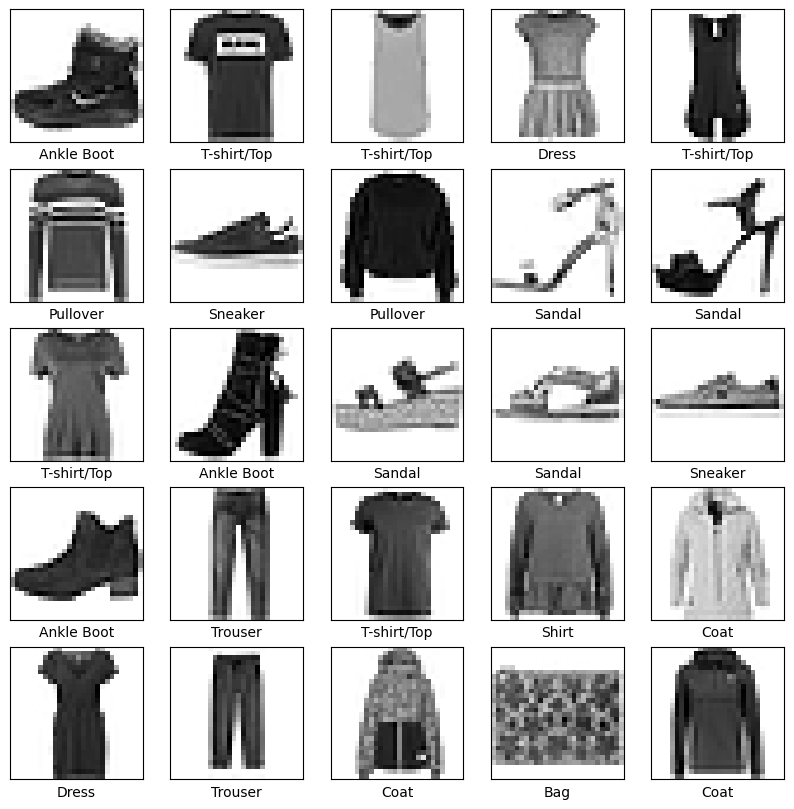

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [20]:

train_images[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [21]:
# normalización de la escala de valores

train_images = train_images / 255.0
test_images = test_images / 255.0

In [22]:
# Flatten toma cada imagen de 28 x 28 y la convierte en un vector de 784 elementos
l0 = tf.keras.layers.Flatten(input_shape=(28, 28))
l1 = tf.keras.layers.Dense(128, activation='relu')
l2 = tf.keras.layers.Dense(32, activation='relu')
l3 = tf.keras.layers.Dense(10, activation='softmax')

In [23]:
model = tf.keras.Sequential([l0, l1, l2,l3])

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10, verbose=False)

test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8784


In [24]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [25]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

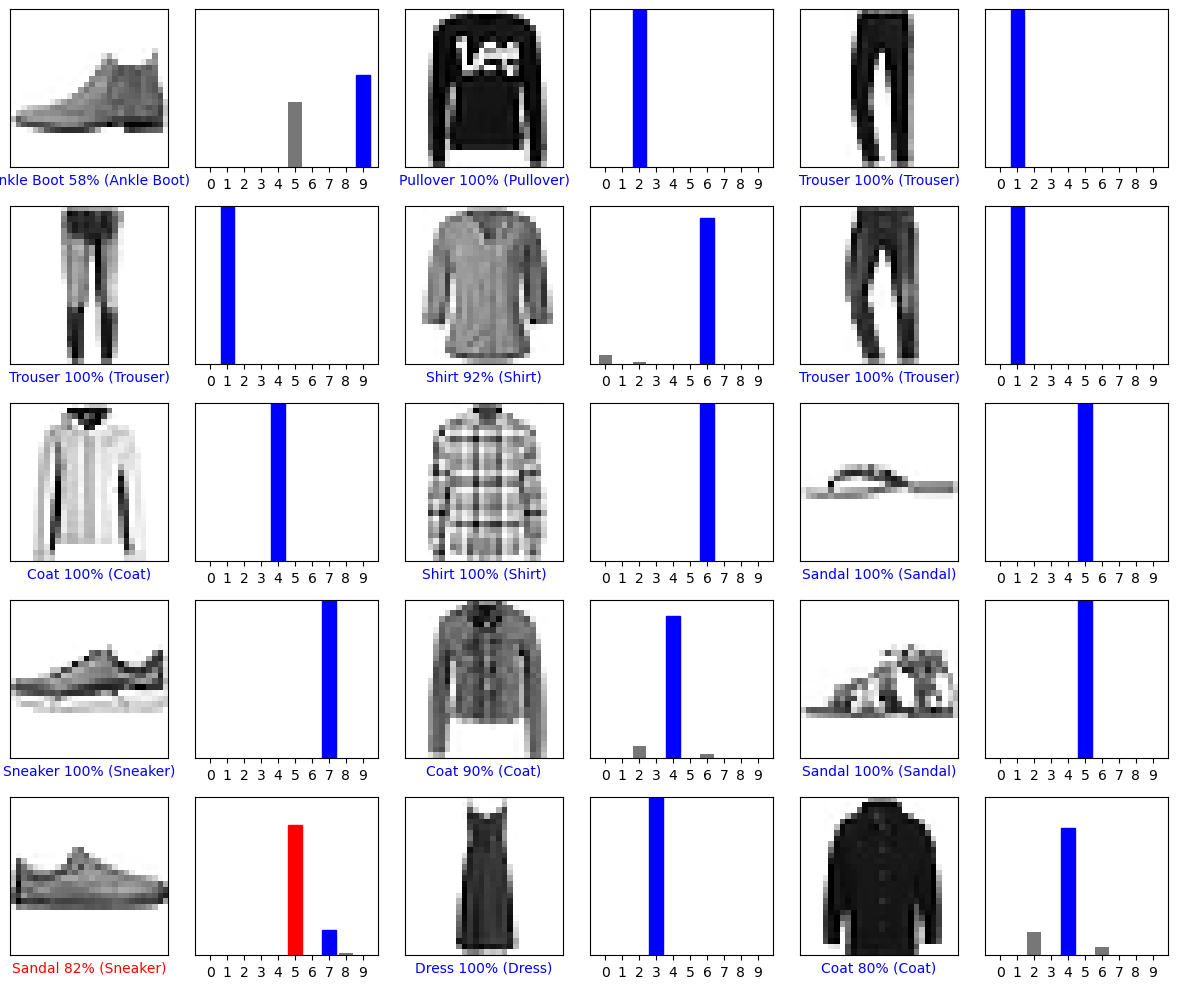

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()